In [1]:
import torch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [3]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
targets =np.array([[0],[1],[1],[0]])
inputs = torch.from_numpy(inputs).float()
targets = torch.from_numpy(targets).float()

In [4]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.fc1 = nn.Linear(2, 4)  
        self.fc2 = nn.Linear(4, 1)  

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [5]:
model = XOR()
criterion = nn.L1Loss()  
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [6]:
train_loss = []
test_loss = []
epoch = 25

In [7]:
for epoch in range(epoch):
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model.eval()
        test = np.array([[0,0],[0,1],[1,0],[1,1]])
        label =np.array([[0],[1],[1],[0]])    
        test = torch.from_numpy(test).float()
        label = torch.from_numpy(label).float()
        outputs = model(test)
        tloss = criterion(outputs, label)

    train_loss.append(loss.item())
    test_loss.append(tloss.item())


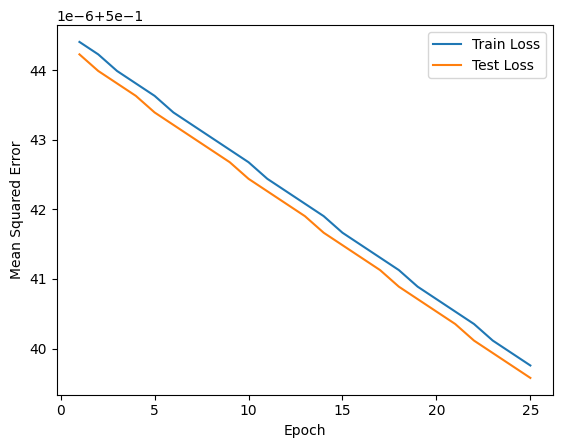

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1,epoch+2),train_loss,label='Train Loss')
plt.plot(range(1,epoch+2),test_loss,label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()